In [5]:
import bnn
root_dir = bnn.BNN_ROOT_DIR
param_dir = bnn.BNN_PARAM_DIR
print(root_dir)
print(param_dir)

/home/xilinx/jupyter_notebooks/BNN-PYNQ-master/bnn
/home/xilinx/jupyter_notebooks/BNN-PYNQ-master/bnn/params


In [6]:

import os 
training_dir = "/home/xilinx"
print(training_dir)


/home/xilinx


In [12]:

bnn.available_params(bnn.NETWORK_LFCW1A1)

['mnist', 'chars_merged']

In [40]:
lfcW1A1_classifier = bnn.LfcClassifier(bnn.NETWORK_LFCW1A1,"mnist",bnn.RUNTIME_HW)
lfcW1A1_classifier.classes


['green', 'red', 'yellow']

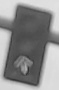

In [111]:
from array import *
from PIL import Image as PIL_Image
from PIL import ImageOps
img_load = PIL_Image.open('/home/xilinx/jupyter_notebooks/BNN-PYNQ-master/notebooks/pictures/green1 (7).jpg').convert("L")  
# Convert to BNN input format  
# The image is resized to comply with the MNIST standard. The image is resized at 28x28 pixels and the colors inverted.   
  
#Resize the image and invert it (white on black)  
smallimg = img_load.resize((28, 28))

data_image = array('B')  
  
pixel = smallimg.load()  
for x in range(0,28):  
    for y in range(0,28):  
        data_image.append(pixel[y,x])
          
# Setting up the header of the MNIST format file - Required as the hardware is designed for MNIST dataset         
hexval = "{0:#0{1}x}".format(1,6)  
header = array('B')  
header.extend([0,0,8,1,0,0])  
header.append(int('0x'+hexval[2:][:2],16))  
header.append(int('0x'+hexval[2:][2:],16))  
header.extend([0,0,0,28,0,0,0,28])  
header[3] = 3 # Changing MSB for image data (0x00000803)  
data_image = header + data_image
output_file = open('/home/xilinx/img_mnist_processed', 'wb')  
data_image.tofile(output_file)  
output_file.close()   
img_load


In [112]:
class_out = lfcW1A1_classifier.classify_mnist("/home/xilinx/img_mnist_processed")
print("Class number: {0}".format(class_out))
print("Class name: {0}".format(lfcW1A1_classifier.class_name(class_out)))


Inference took 23.00 microseconds
Classification rate: 43478.26 images per second
Class number: 2
Class name: yellow


In [94]:
!wget -nc http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz; gunzip -f t10k-images-idx3-ubyte.gz
!wget -nc http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz; gunzip -f t10k-labels-idx1-ubyte.gz

--2019-02-21 03:22:32--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘fashion-mnist.s3-website.eu-central-1.amazonaws.com’
gzip: t10k-images-idx3-ubyte.gz: No such file or directory
--2019-02-21 03:22:32--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘fashion-mnist.s3-website.eu-central-1.amazonaws.com’
gzip: t10k-labels-idx1-ubyte.gz: No such file or directory


In [95]:
!ls *ubyte

ls: cannot access '*ubyte': No such file or directory


In [9]:
ret = c.inference_multiple("t10k-images-idx3-ubyte")

Inference took 69150.00 microseconds, 6.91 usec per image
Classification rate: 144613.16 images per second


In [11]:
import numpy as np
with open("t10k-labels-idx1-ubyte", 'rb') as f:
  ret_test_golden = np.frombuffer(f.read(), np.uint8, offset=8)
np.unique(ret_test_golden == ret, return_counts=True)

(array([False,  True], dtype=bool), array([1513, 8487]))